In [1]:
import pandas as pd

return_series = pd.read_csv('/Users/haofu/Desktop/portfolio_backtester/exp/backtest_results/strategy_1/20241217_152117/returns.csv')

print(return_series)

            date   returns
0     2007-06-15  0.089861
1     2007-06-18 -0.053622
2     2007-06-19  0.035596
3     2007-06-20 -0.106071
4     2007-06-21  0.081413
...          ...       ...
4370  2024-10-24 -0.002157
4371  2024-10-25 -0.049761
4372  2024-10-28  0.115510
4373  2024-10-29 -0.053598
4374  2024-10-30 -0.067756

[4375 rows x 2 columns]


In [12]:
# Load the data
return_series = pd.read_csv('/Users/haofu/Desktop/portfolio_backtester/exp/backtest_results/strategy_1/20241217_152117/returns.csv')

# Find the minimum return and its date
worst_return = return_series['returns'].min()
worst_date = return_series.loc[return_series['returns'] == worst_return, 'date'].iloc[0]

print(f"Worst day: {worst_date}")
print(f"Return on worst day: {worst_return:.2%}")

# You might also want to see the days around the worst day
window = 2  # Days before and after
worst_index = return_series[return_series['returns'] == worst_return].index[0]
window_start = max(0, worst_index - window)
window_end = min(len(return_series), worst_index + window + 1)

print("\nReturns around worst day:")
print(return_series.iloc[window_start:window_end])

Worst day: 2008-10-13
Return on worst day: -117.33%

Returns around worst day:
           date   returns
333  2008-10-09  0.231128
334  2008-10-10 -0.094521
335  2008-10-13 -1.173327
336  2008-10-14  0.179507
337  2008-10-15  0.832207


In [ ]:
def portfolio_simulator(etf_data: pd.DataFrame, weights: dict):
    start_date = list(portfolio_weights.keys())[0]
    etf_data = etf_data.loc[start_date:]

    etf_data.index = pd.to_datetime(etf_data.index)
    # Create a DataFrame to store the weights
    df_weights = pd.DataFrame(index=etf_data.index, columns=etf_data.columns)
    for date, weights in portfolio_weights.items():
        df_weights.loc[date, weights.keys()] = list(weights.values())

    # Fill forward weights for missing dates
    df_weights.fillna(method="ffill", inplace=True)
    df_weights.fillna(0, inplace=True)  # Fill any remaining NaN with 0

    # Calculate daily portfolio value
    normalized_prices = etf_data / etf_data.iloc[0]  # Normalize prices to start at 1
    print(len(normalized_prices), len(df_weights))
    weighted_prices = normalized_prices * df_weights  # Apply weights
    portfolio_values = weighted_prices.sum(axis=1)
    # portfolio_values = portfolio_values.replace(0.0, 1.0)

    # Calculate daily portfolio returns
    portfolio_returns = portfolio_values.pct_change()

    # Calculate cumulative returns
    cumulative_returns = (1 + portfolio_returns).cumprod()

    return (
        portfolio_returns,
        df_weights,
        weighted_prices,
        portfolio_values,
        cumulative_returns,
    )

In [13]:
# Let's demonstrate with sample data
dates = pd.date_range('2023-01-01', '2023-01-31')
# Create sample data with some missing days
df = pd.DataFrame(index=dates)
df = df[~df.index.isin(['2023-01-13', '2023-01-20'])]  # Remove some Fridays

# Group by week ending Friday
weekly = df.groupby(pd.Grouper(freq='W-FRI')).last()

print("Original dates:", df.index.strftime('%Y-%m-%d').tolist())
print("\nWeekly last days:", weekly.index.strftime('%Y-%m-%d').tolist())

Original dates: ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-31']

Weekly last days: ['2023-01-06', '2023-01-13', '2023-01-20', '2023-01-27', '2023-02-03']


/var/folders/f8/wwwwfy_x5tl686n3tb4qn5x40000gn/T/ipykernel_60477/2574900566.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df = df[~df.index.isin(['2023-01-13', '2023-01-20'])]  # Remove some Fridays


In [15]:
import yfinance as yf
# Define the tickers and date range
tickers = ["FXE", "EWJ", "GLD", "QQQ", "SPY", "SHV", "DBA", "USO", "XBI", "ILF", "EPP", "FEZ"]
start_date = "2007-03-01"
end_date = "2024-10-31"

# Download ETF data
etf_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  12 of 12 completed


In [16]:
last_trading_days = etf_data.groupby(pd.Grouper(freq='W-FRI')).last()

In [20]:
print(last_trading_days.index[70:90])

DatetimeIndex(['2008-07-04 00:00:00+00:00', '2008-07-11 00:00:00+00:00',
               '2008-07-18 00:00:00+00:00', '2008-07-25 00:00:00+00:00',
               '2008-08-01 00:00:00+00:00', '2008-08-08 00:00:00+00:00',
               '2008-08-15 00:00:00+00:00', '2008-08-22 00:00:00+00:00',
               '2008-08-29 00:00:00+00:00', '2008-09-05 00:00:00+00:00',
               '2008-09-12 00:00:00+00:00', '2008-09-19 00:00:00+00:00',
               '2008-09-26 00:00:00+00:00', '2008-10-03 00:00:00+00:00',
               '2008-10-10 00:00:00+00:00', '2008-10-17 00:00:00+00:00',
               '2008-10-24 00:00:00+00:00', '2008-10-31 00:00:00+00:00',
               '2008-11-07 00:00:00+00:00', '2008-11-14 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', freq='W-FRI')


In [2]:
import pandas as pd

def calculate_performance_metrics(cumulative_returns: pd.Series):
    # annualized return
    num_days = (cumulative_returns.index[-1] - cumulative_returns.index[0]).days
    annualized_return = (cumulative_returns.iloc[-1] / 1) ** (250 / num_days) - 1

    # Daily returns
    daily_returns = cumulative_returns.pct_change()

    # annualized volatility
    daily_returns = cumulative_returns.pct_change()
    annualized_volatility = daily_returns.std() * np.sqrt(250)

    # Sharpe ratio
    risk_free_rate = 0.0
    excess_daily_returns = daily_returns - risk_free_rate / 250
    sharpe_ratio = excess_daily_returns.mean() / excess_daily_returns.std()

    # Daily mean arithmetic return
    daily_mean_arithmetic = daily_returns.mean()

    # Daily mean geometric return
    daily_mean_geometric = (np.prod(1 + daily_returns) ** (1 / len(daily_returns))) - 1

    # Daily minimum return
    daily_min_return = daily_returns.min()

    # Maximum 10-day drawdown
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - rolling_max) / rolling_max
    rolling_drawdown = drawdown.rolling(window=10).min()
    max_10day_drawdown = rolling_drawdown.min()

    # Skewness
    skewness = skew(daily_returns, nan_policy='omit')

    # Kurtosis
    kurtosis_value = kurtosis(daily_returns, nan_policy='omit')

    # Modified VaR (95%)
    alpha = 0.05
    z = -1.65  # Z-score for 95% confidence level
    modified_var = z * daily_returns.std() + ((z**2 - 1) * skewness / 6) + ((z**3 - 3 * z) * kurtosis_value / 24)

    # Conditional VaR (CVaR) (95%)
    var_95 = np.percentile(daily_returns, 5)
    cvar_95 = daily_returns[daily_returns <= var_95].mean()

    # Collect all metrics
    metrics = {
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Daily Mean Arithmetic Return": daily_mean_arithmetic,
        "Daily Mean Geometric Return": daily_mean_geometric,
        "Daily Minimum Return": daily_min_return,
        "Max 10-day Drawdown": max_10day_drawdown,
        "Skewness": skewness,
        "Kurtosis": kurtosis_value,
        "Modified VaR (95%)": modified_var,
        "Conditional VaR (95%)": cvar_95
    }

    return metrics


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_performance_metrics(returns_file_path: str):
    """
    Calculate performance metrics from returns CSV file
    
    Args:
        returns_file_path: Path to returns CSV file
    """
    # Load data and properly set index
    df = pd.read_csv(returns_file_path)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    
    cumulative_returns = pd.Series(df['cumulative_returns'])
    cumulative_returns.index = pd.to_datetime(df.index)
    
    # Calculate days
    num_days = (cumulative_returns.index[-1] - cumulative_returns.index[0]).days
    annualized_return = (cumulative_returns.iloc[-1] + 1) ** (250 / num_days) - 1

    # Daily returns
    daily_returns = df['returns']

    # Annualized volatility
    annualized_volatility = daily_returns.std() * np.sqrt(250)

    # Sharpe ratio
    risk_free_rate = 0.0
    excess_daily_returns = daily_returns - risk_free_rate / 250
    sharpe_ratio = excess_daily_returns.mean() / excess_daily_returns.std() * np.sqrt(250)

    # Daily mean arithmetic return
    daily_mean_arithmetic = daily_returns.mean()

    # Daily mean geometric return
    daily_mean_geometric = (np.prod(1 + daily_returns) ** (1 / len(daily_returns))) - 1

    # Daily minimum return
    daily_min_return = daily_returns.min()

    # Maximum 10-day drawdown
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - rolling_max) / rolling_max
    rolling_drawdown = drawdown.rolling(window=10).min()
    max_10day_drawdown = rolling_drawdown.min()

    # Skewness
    skewness = skew(daily_returns, nan_policy='omit')

    # Kurtosis
    kurtosis_value = kurtosis(daily_returns, nan_policy='omit')

    # Modified VaR (95%)
    alpha = 0.05
    z = -1.65  # Z-score for 95% confidence level
    modified_var = z * daily_returns.std() + ((z**2 - 1) * skewness / 6) + ((z**3 - 3 * z) * kurtosis_value / 24)

    # Conditional VaR (CVaR) (95%)
    var_95 = np.percentile(daily_returns, 5)
    cvar_95 = daily_returns[daily_returns <= var_95].mean()

    # Collect all metrics
    metrics = {
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Daily Mean Arithmetic Return": daily_mean_arithmetic,
        "Daily Mean Geometric Return": daily_mean_geometric,
        "Daily Minimum Return": daily_min_return,
        "Max 10-day Drawdown": max_10day_drawdown,
        "Skewness": skewness,
        "Kurtosis": kurtosis_value,
        "Modified VaR (95%)": modified_var,
        "Conditional VaR (95%)": cvar_95
    }

    return metrics, df

# Usage:
file_path = '/Users/haofu/Desktop/portfolio_backtester/exp/backtest_results/strategy_1/20241217_183301/returns.csv'
metrics, df = calculate_performance_metrics(file_path)

# Print metrics in a formatted way
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Return df for further analysis if needed
print("\nReturns DataFrame head:")
print(df.head())

Annualized Return: 0.0006
Annualized Volatility: 1.1824
Sharpe Ratio: 0.3956
Daily Mean Arithmetic Return: 0.0019
Daily Mean Geometric Return: -0.0010
Daily Minimum Return: -0.5095
Max 10-day Drawdown: -0.9992
Skewness: 0.1148
Kurtosis: 4.6939
Modified VaR (95%): -0.0009
Conditional VaR (95%): -0.1681

Returns DataFrame head:
             returns  cumulative_returns
date                                    
2007-06-15  0.048898            1.048898
2007-06-18  0.021195            1.071130
2007-06-19 -0.063545            1.003065
2007-06-20  0.017845            1.020965
2007-06-21 -0.007090            1.013726


In [6]:
cum_rt = pd.Series(df['cumulative_returns'])

In [7]:

calculate_performance_metrics(cum_rt)

AttributeError: 'int' object has no attribute 'days'


Combined metrics summary:
    total_return  annual_return  volatility  sharpe_ratio  max_drawdown  \
5       0.465299       0.970314    1.165659      0.548541     -0.991608   
10      0.217652       0.941706    1.171659      0.515709     -0.995190   
1       0.198306       0.938259    1.185549      0.519874     -0.997141   
14      0.155049       0.929209    1.196173      0.513759     -0.997268   
2       0.162423       0.930912    1.167890      0.500195     -0.998362   
13      0.401051       0.964652    1.178112      0.549923     -0.998216   
3       0.192535       0.937169    1.190915      0.522128     -0.996963   
4       0.130452       0.922909    1.187885      0.500152     -0.997944   
8       0.075261       0.903128    1.135414      0.444489     -0.994200   
6       0.131858       0.923298    1.168414      0.491110     -0.992229   
15      0.015019       0.847580    1.182365      0.395552     -0.999173   
7       0.076515       0.903717    1.185673      0.478383     -0.995996  

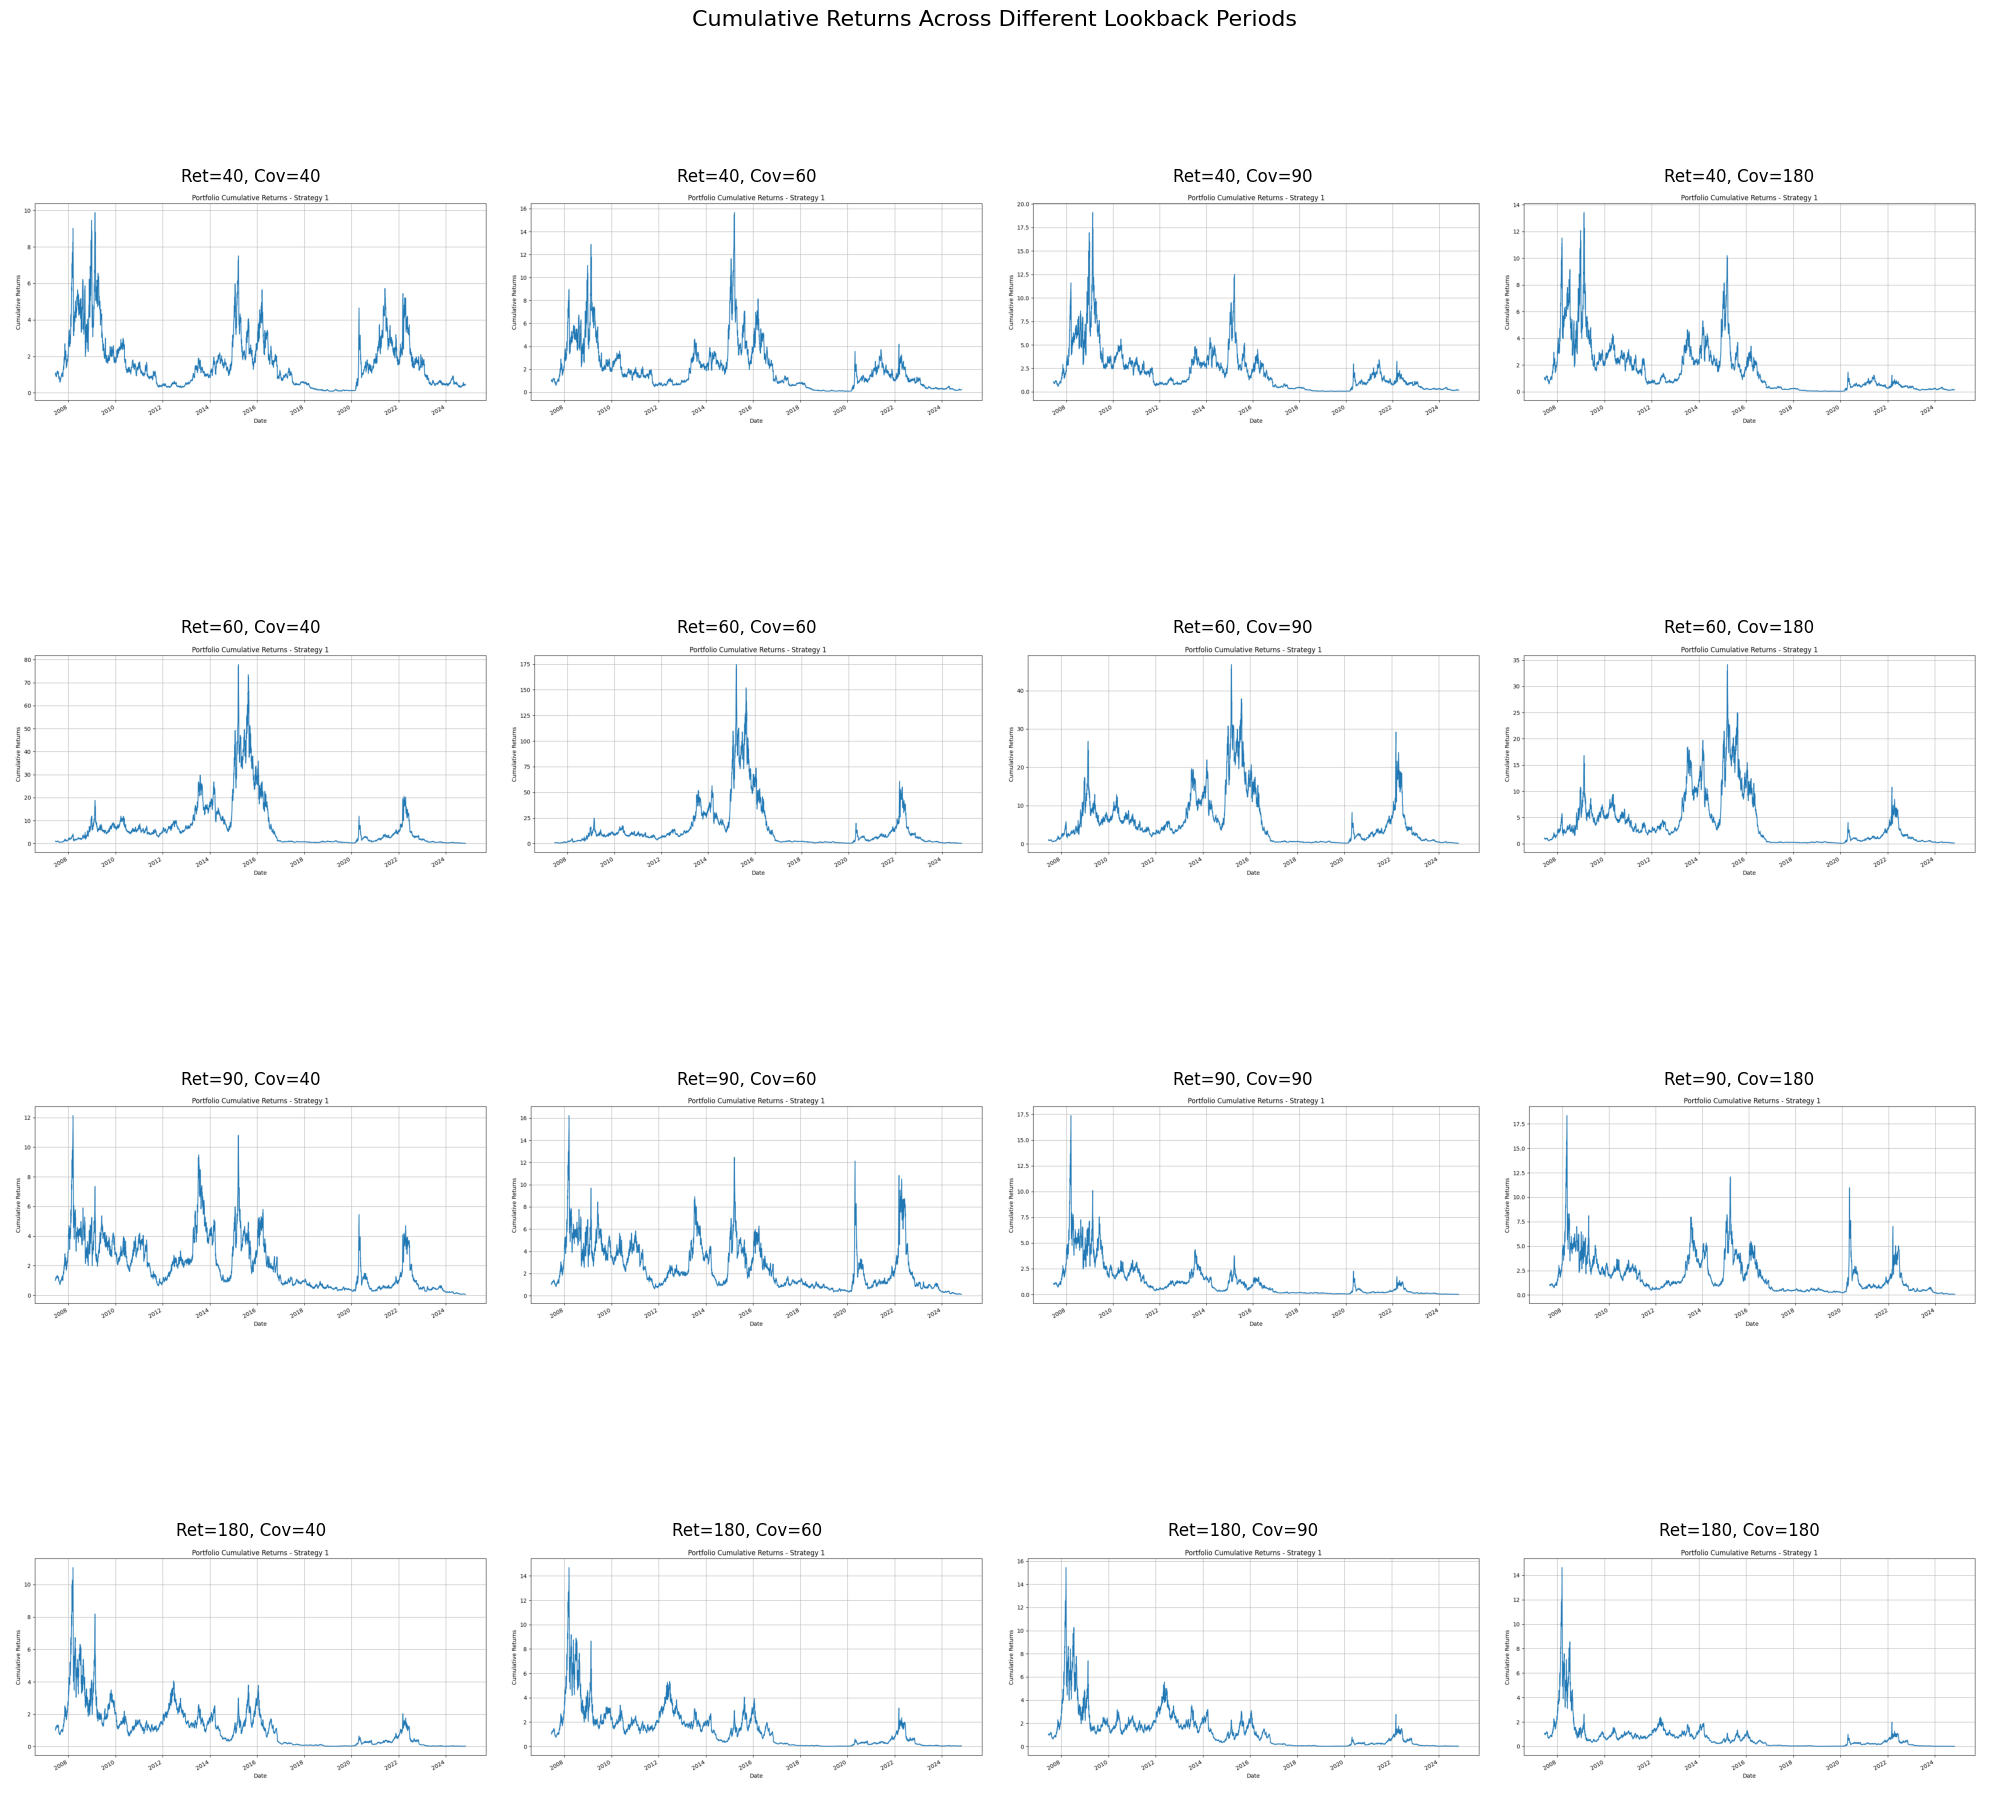

In [10]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

def read_metrics(path):
    """Read metrics.json file and return as dictionary with configuration info"""
    with open(path, 'r') as f:
        metrics = json.load(f)
    
    # Extract lookback days from path
    path_parts = path.split('/')
    strategy_config = path_parts[-2]  # Gets the folder name like 'strategy_1_ret_40_cov_40'
    
    # Extract ret and cov days
    config_parts = strategy_config.split('_')
    ret_days = int(config_parts[3])
    cov_days = int(config_parts[5])
    
    # Add configuration to metrics
    metrics['lookback_days_ret'] = ret_days
    metrics['lookback_days_cov'] = cov_days
    
    return metrics

def combine_metrics(base_path):
    """Combine metrics from all configurations into a single DataFrame"""
    metrics_files = glob(os.path.join(base_path, "strategy_1_ret_*_cov_*/metrics.json"))
    all_metrics = []
    
    for metrics_file in metrics_files:
        metrics = read_metrics(metrics_file)
        all_metrics.append(metrics)
    
    return pd.DataFrame(all_metrics)

def plot_combined_returns(base_path):
    """Create a 4x4 grid of cumulative returns plots"""
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    fig.suptitle('Cumulative Returns Across Different Lookback Periods', fontsize=16)
    
    # Lists of lookback periods
    lookback_periods = [40, 60, 90, 180]
    
    for i, lb_ret in enumerate(lookback_periods):
        for j, lb_cov in enumerate(lookback_periods):
            plot_path = os.path.join(
                base_path, 
                f"strategy_1_ret_{lb_ret}_cov_{lb_cov}/plots/cumulative_returns.png"
            )
            
            if os.path.exists(plot_path):
                img = plt.imread(plot_path)
                axes[i, j].imshow(img)
                axes[i, j].set_title(f'Ret={lb_ret}, Cov={lb_cov}')
            
            axes[i, j].axis('off')
    
    plt.tight_layout()
    return fig

def main(base_path):
    """Main function to generate combined analysis"""
    # Combine metrics
    metrics_df = combine_metrics(base_path)
    
    # Sort metrics by lookback periods for better readability
    metrics_df = metrics_df.sort_values(['lookback_days_ret', 'lookback_days_cov'])
    
    # Create combined plot
    fig = plot_combined_returns(base_path)
    
    # Save results
    metrics_df.to_csv(os.path.join(base_path, 'combined_metrics.csv'), index=False)
    fig.savefig(os.path.join(base_path, 'combined_returns.png'))
    
    return metrics_df

if __name__ == "__main__":
    # Extract base path from the example path provided
    base_path = '/Users/haofu/Desktop/portfolio_backtester/exp/backtest_results/20241217'
    
    # Run analysis
    metrics_df = main(base_path)
    print("\nCombined metrics summary:")
    print(metrics_df)